In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("superstore_clean.csv")

In [4]:
df

,OrderID,ProductCategory,SubCategory,Region,Quantity,Sales,TotalSales
0,1,Technology,Phones,East,9,266,2394
1,2,Furniture,Phones,East,2,142,284
2,3,Technology,Binders,Central,9,285,2565
3,4,Technology,Phones,Central,9,273,2457
4,5,Furniture,Chairs,West,8,180,1440
...,...,...,...,...,...,...,...
495,496,Office Supplies,Chairs,West,16,258,4128
496,497,Office Supplies,Accessories,Central,10,466,4660
497,498,Furniture,Tables,East,10,458,4580
498,499,Office Supplies,Binders,Central,12,340,4080


In [6]:
conn = sqlite3.connect("sales_data.db")

In [7]:
df.to_sql("sales", conn, if_exists="replace", index=False)
print("Database created and table 'sales' loaded successfully!")

Database created and table 'sales' loaded successfully!


In [8]:
query = """
SELECT ProductCategory,
       SUM(Quantity) AS total_qty,
       SUM(Quantity * Sales) AS revenue
FROM sales
GROUP BY ProductCategory
"""
df_summary = pd.read_sql_query(query, conn)

In [9]:
print("\nSales Summary:")
print(df_summary)


Sales Summary:
   ProductCategory  total_qty  revenue
0        Furniture       1815   478148
1  Office Supplies       1652   424096
2       Technology       1605   402268



Sales Summary:
   ProductCategory  total_qty  revenue
0        Furniture       1815   478148
1  Office Supplies       1652   424096
2       Technology       1605   402268


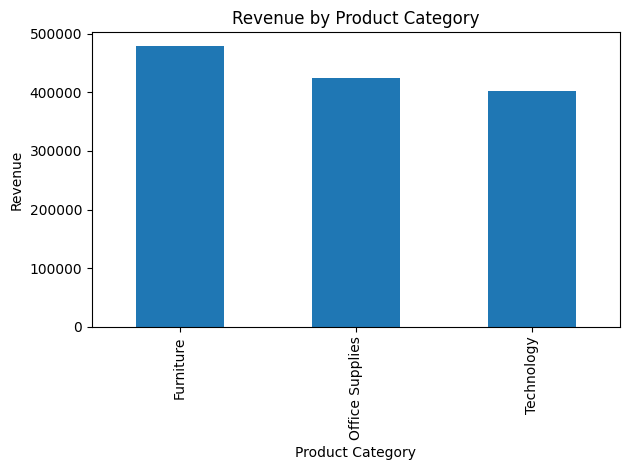

In [10]:
print("\nSales Summary:")
print(df_summary)

df_summary.plot(kind="bar", x="ProductCategory", y="revenue", legend=False)
plt.title("Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

In [11]:
conn.close()